In [12]:
import potential1D as pot
import matplotlib.pyplot as plt
%matplotlib inline

positions = [x / float(10) for x in range(-250, 251)]


501 501


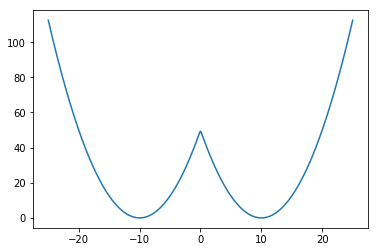

In [28]:
#two easy state examples;
s=1
Eoffs=(0, 0)
V_is=[pot.harmonicOsc1D(x_shift=-10), pot.harmonicOsc1D(x_shift=10)]
eds_pot = pot.envelopedPotential(V_is=V_is, s=s, Eoff_i=Eoffs)

energies = eds_pot.ene(positions)
print(len(positions), len(energies))
plt.plot(positions, energies)


501 501


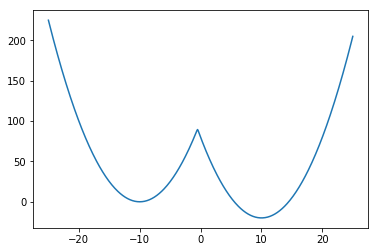

In [26]:
#enveloped double well example

doubel_well = pot.envelopedDoubleWellPotential(x_shifts=[-10,10], y_shifts=[0,20], fcs=[2,2])
energies = doubel_well.ene(positions)
print(len(positions), len(energies))

plt.plot(positions, energies)


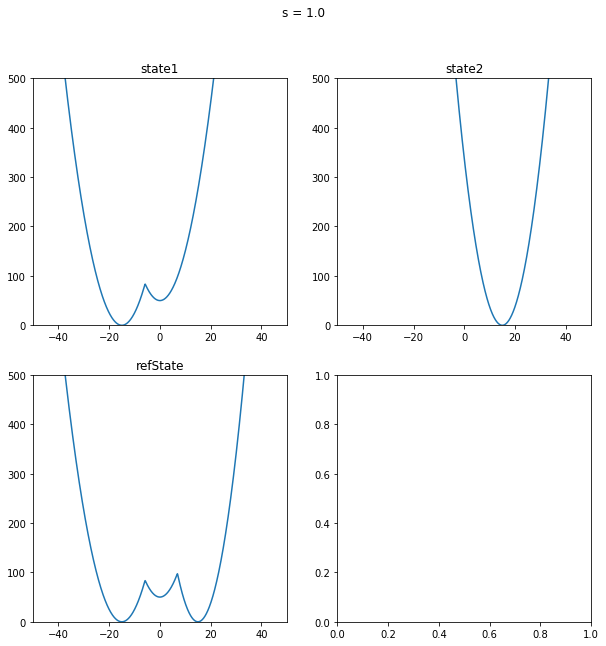

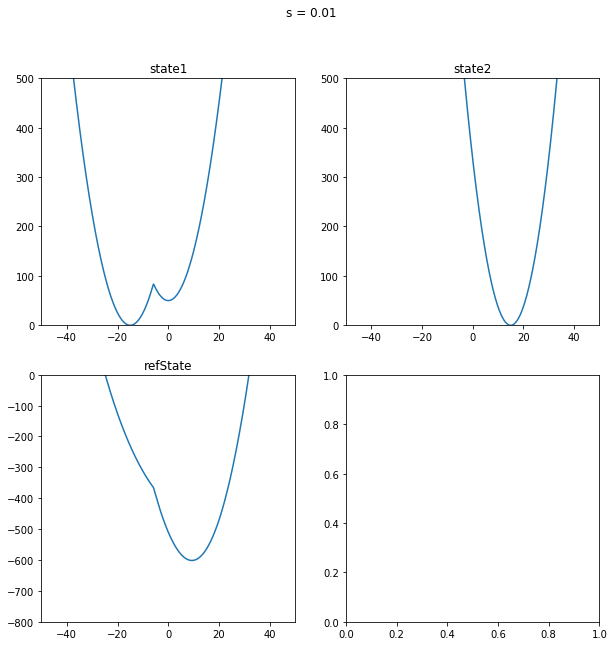

In [56]:
#More copmlex example
positions = [x / float(10) for x in range(-500, 501)]

#states
double_well = pot.envelopedDoubleWellPotential(x_shifts=[-15,0], y_shifts=[0,-50], fcs=[2,2])
harm_pot = pot.harmonicOsc1D(x_shift=15, fc=3)

#s=1
##enveloping potential
V_is = [double_well, harm_pot]
s=1
Eoffs=(0, 0)
eds_pot = pot.envelopedPotential(V_is=V_is, s=s, Eoff_i=Eoffs)

##calc energies
state1 = double_well.ene(positions)
state2 = harm_pot.ene(positions)
reference_state = eds_pot.ene(positions)

##plot nicely
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = [ax for ax_row in axes for ax in ax_row]
xs = [positions, positions,positions]
ys = [state1, state2, reference_state]
labels = ["state1", "state2", "refState"]
for ind, ax, x, y, label in zip(range(1,4), axes, xs, ys, labels):
    ax.plot(x, y)
    ax.set_ylim(0,500)
    ax.set_xlim(-50,50)
    ax.set_title(label)
fig.suptitle("s = 1.0")
fig.show()

#s=0.01
##set new s
eds_pot.s = 0.001
##calc energies
reference_state = eds_pot.ene(positions)
##plot nicely
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = [ax for ax_row in axes for ax in ax_row]
xs = [positions, positions,positions]
ys = [state1, state2, reference_state]
labels = ["state1", "state2", "refState"]
for ind, ax, x, y, label in zip(range(1,4), axes, xs, ys, labels):
    ax.plot(x, y)
    if(ind != 3): 
        ax.set_ylim(0,500)
    else:
        ax.set_ylim(-800,0)

    ax.set_xlim(-50,50)
    ax.set_title(label)
fig.suptitle("s = 0.01")
fig.show()
